In [1]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

In [7]:
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/graficas.csv")
print(len(d))

126


In [8]:
e = d.loc[d.Tamaño == '80x200']
print(len(e))

63


48
63
0.4779587388038635 4.288025299726397e-18 0.05 no normal
0.4779587388038635 4.288025299726397e-18 0.01 no normal


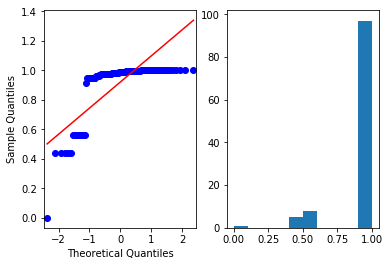

In [12]:
d1 = e.loc[e.Dev >= .90]
print(len(d1))
d2 = e.loc[~isnan(e.Training)]
print(len(d2))
m = pd.concat([d1, d2])
d = m.Test.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



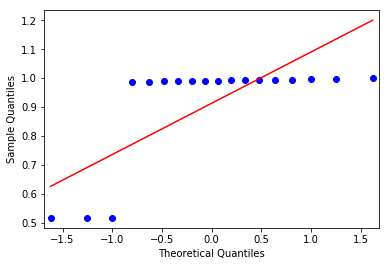

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib as plt
from numpy.random import randn
from numpy import concatenate

d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/graficas.csv")
o1 = d.loc[d.Optimizador == 'Adam'].Dev # elisa primera
o2 = d.loc[d.Optimizador == 'Adamax'].Dev # elisa segunda
o3 = d.loc[d.Optimizador == 'Nadam'].Dev # moi primera
o4 = d.loc[d.Optimizador == 'RMSProp'].Dev # moi segunda
o5 = d.loc[d.Optimizador == 'SGD'].Dev # moi 
o6 = d.loc[d.Optimizador == 'Adadelta'].Dev # moi segunda
o7 = d.loc[d.Optimizador == 'Adagrad'].Dev # moi segunda

layout = {'xaxis': {'range': [0, 100]}, 'yaxis': {'range': [0, 1]}, \
    'shapes': [{'type': 'line', 'x0': 70, 'y0': 0, 'x1': 70, 'y1': 1, \
            'line': {'color': 'rgb(255, 0, 0)', 'width': 2}}]}

py.iplot({'data': [go.Histogram(x = o7, histnorm='probability')], 'layout': layout}, filename='Dev')

unimodal = 15 * randn(1000) + 75 # varianza 15, media 75
bimodal = concatenate((unimodal, 20 * randn(1000) + 45)) # lo mismo pero ahora con un segundo bulto agregado

f = qqplot(o1, line='s')
#plt.savefig(f, "qq_cfep.png")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('w-data.csv')

In [6]:
cdata = data.drop(['id','Unnamed: 32'], axis = 1)
cdata= pd.get_dummies(cdata,'diagnosis',drop_first=True)

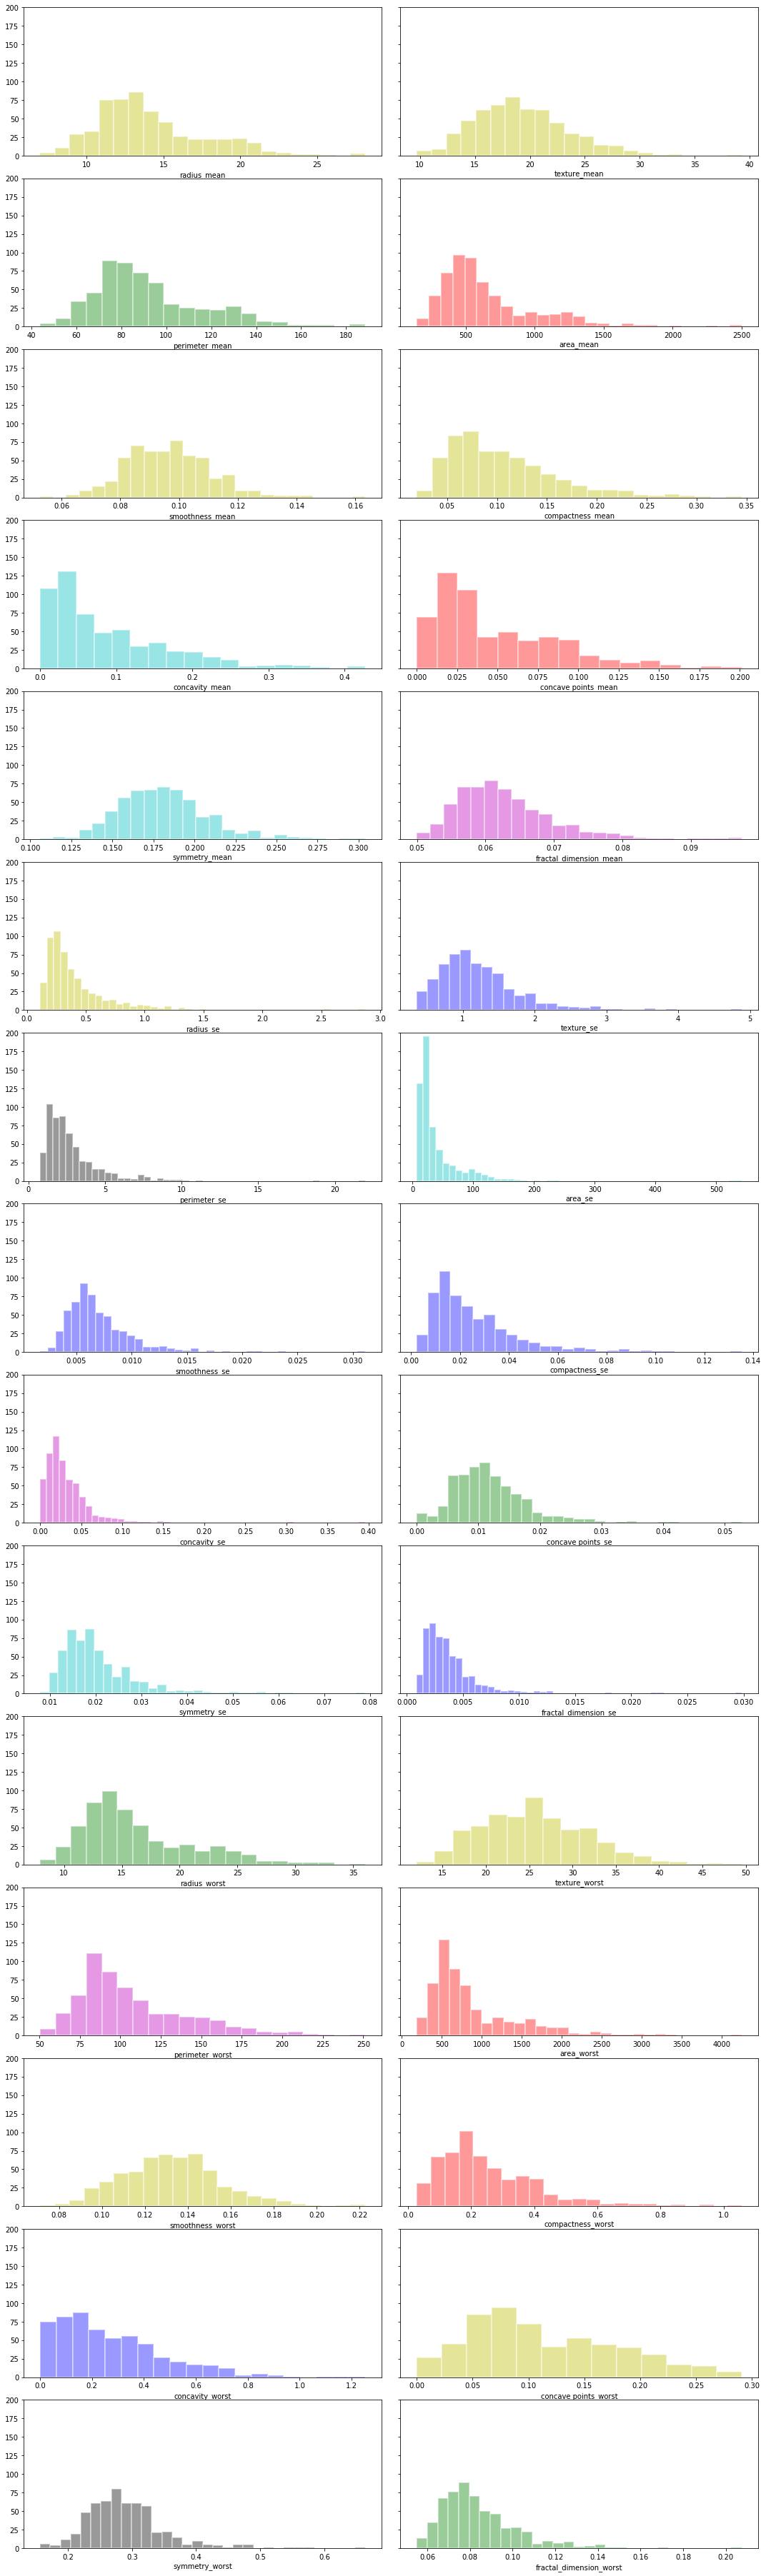

In [7]:
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(cdata.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(cdata[cdata.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [9]:
data = pd.read_csv('w-data.csv')
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [10]:
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [11]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [12]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
#plot_distribution('smoothness_mean', .5)
#plot_distribution('compactness_mean' .5)
#plot_distribution('concavity_mean' .5)
#plot_distribution('concave points_mean' .5)
#plot_distribution('symmetry_mean' .5)
#plot_distribution('fractal_dimension_mean' .5)

In [13]:
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [14]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [15]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

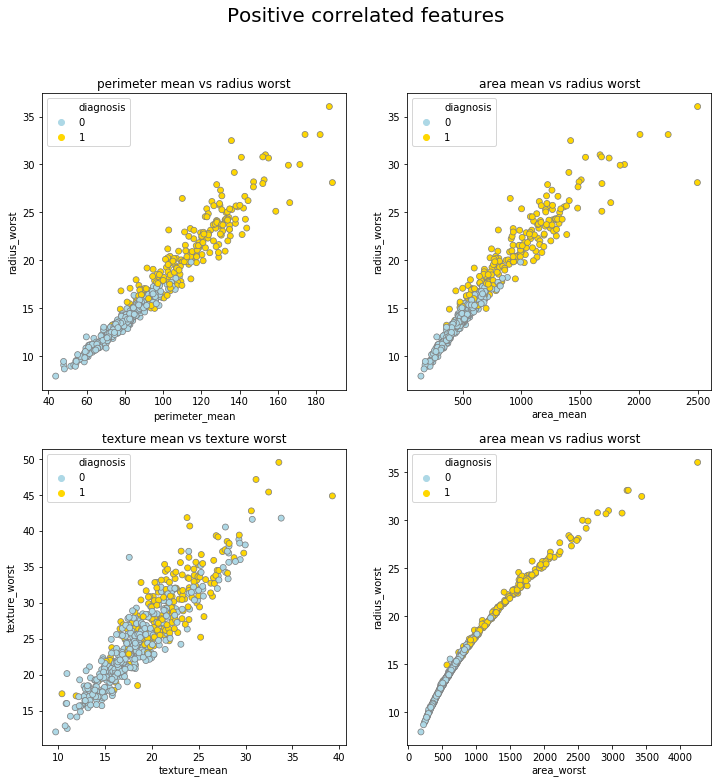

In [16]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

In [17]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

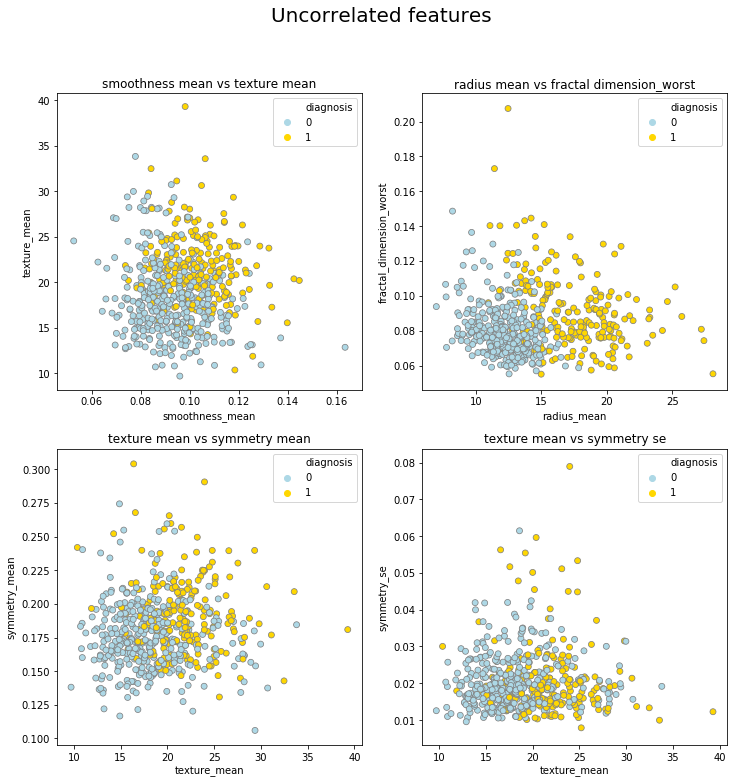

In [18]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()